# Урок 3. TensorFlow
# Домашнее задание

### <span class="burk">Задание 1.</span>
**Имеются два массива с рукописными буквами и с характеристиками вина. Нужно выбрать датасет, возможно, предварительно обработать, создать модель, обучить и проверить точность на тестовом датасете. Напишите свои мысли по поводу результатов.
При желании можно рассмотреть оба датасета, можете попробовать применить другие методы машинного обучения, известные вам, и сравнить результаты обучения.**

In [ ]:
import tensorflow as tf

print(tf.__version__)
msg = tf.constant('TensorFlow Version')
tf.print(msg)

2.8.2
TensorFlow Version


## Датасет с винами

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [ ]:
data = load_wine()

In [ ]:
list(data.target_names)

['class_0', 'class_1', 'class_2']

In [ ]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
data.data.shape, data.target.shape

((178, 13), (178,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, shuffle=True, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

# Датасет с рукописными буквами

https://www.tensorflow.org/datasets/catalog/binary_alpha_digits

In [27]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, multilabel_confusion_matrix

print("TensorFlow version: ", tf.__version__)
print("Keras version: ", keras.__version__)
print("Matplotlib version: ", matplotlib.__version__)
print("Numpy version: ", np.__version__)
print("Sci-Kit Learn version: ", sklearn.__version__)

TensorFlow version:  2.8.2
Keras version:  2.8.0
Matplotlib version:  3.2.2
Numpy version:  1.21.6
Sci-Kit Learn version:  1.0.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print(classes)

X = np.load('/content/drive/MyDrive/Colab Notebooks/13_3_binary_alpha_digits_images.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/13_3_binary_alpha_digits_labels.npy')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [4]:
X.shape, y.shape

((1404, 20, 16), (1404,))

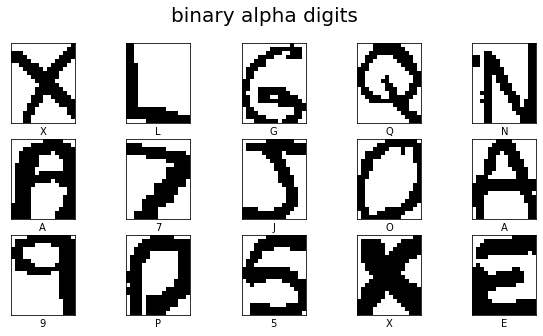

In [5]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
fig.suptitle('binary alpha digits', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X[n], cmap=plt.cm.binary)
    ax.set_xlabel(classes[y[n]])
    n += 1

In [6]:
train_images, test_images, train_labels, test_labels = train_test_split(X, y,
                                                      shuffle=True,
                                                      test_size=0.2,
                                                      random_state=21,
                                                      stratify=y
                                                      )

In [7]:
print(train_images.shape, len(train_labels), train_labels, sep='\n')

(1123, 20, 16)
1123
[ 2 14  1 ...  7  2  2]


In [8]:
print(test_images.shape, len(test_labels), test_labels, sep='\n')

(281, 20, 16)
281
[23 20 11 33  9  1  3 25 24 23 18 24 32 19 14 28 16  9 35  5 14 20  1 26
 17  1 16 20 34 22 25 11 31 12 34  3  8 28  6 13  8 29 21 27 15 23  6  9
 11  2 34 18 33 32 31  5 17 12 16 31 20 30 12 35 26  0 24 32  9  4 21 35
 20 21 10 22 27 30 20 32 15 15 17 13 23 28  9 17 27  7 32 29  0 25  0 17
 29  5 34 25 30 29 18 13  2  3 25  2 14 15  8 17  7 18 10 29 18 11 35 27
  4 30 26  4 33 30 15 19 22 19  3 23 25 12  7  2 26 16 21 19  4  3 24 31
 29  2 35 33 22  8 11 24 19 16 28  6  8  5  0 13  4 28 26 26 14 20 18 33
 11 27  9  5 10 10 12  2 30  3  1 31 15  8 28 16  0 19 12  8 32  6 29 24
 11  6 21  2 19 34 20  4  4 17 12 24 17 11 31 13  5 35 34 25  5 22 31 14
 22 29 10 18  7  7 25 34 14 13 15  6 30 27  2 28 14  1 24 33 15  3 12 16
  1 22 14 35 33 26 21  4 10  8  7 30 10  6 21 33  0 16 13 35 19 10  5 26
  0 23 22  9 34 28  1  9 21  0 27  6 23 31  7 32 27]


## Обучение

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(64, activation='tanh'),
    # keras.layers.Dense(128, activation='tanh'),
    # keras.layers.Dense(256, activation='tanh'),
    keras.layers.Dense(36)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(36)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
hstr = model.fit(train_images, train_labels, epochs=9, verbose=1)

Epoch 1/7
36/36 [==============================] - 1s 4ms/step - loss: 3.2909 - accuracy: 0.1719
Epoch 2/7
36/36 [==============================] - 0s 4ms/step - loss: 2.0622 - accuracy: 0.5031
Epoch 3/7
36/36 [==============================] - 0s 6ms/step - loss: 1.2306 - accuracy: 0.6572
Epoch 4/7
36/36 [==============================] - 0s 6ms/step - loss: 0.8957 - accuracy: 0.7453
Epoch 5/7
36/36 [==============================] - 0s 7ms/step - loss: 0.6861 - accuracy: 0.8103
Epoch 6/7
36/36 [==============================] - 0s 7ms/step - loss: 0.5759 - accuracy: 0.8388
Epoch 7/7
36/36 [==============================] - 0s 6ms/step - loss: 0.4652 - accuracy: 0.8611


In [18]:
hstr.history

{'accuracy': [0.17186108231544495,
  0.5031166672706604,
  0.6571683287620544,
  0.7453250288963318,
  0.8103294968605042,
  0.8388245701789856,
  0.861086368560791],
 'loss': [3.290931224822998,
  2.0622143745422363,
  1.2306016683578491,
  0.8957288265228271,
  0.6861376762390137,
  0.5759286880493164,
  0.4652433395385742]}

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 320)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               41088     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 36)                4644      
                                                                 
Total params: 62,244
Trainable params: 62,244
Non-trainable params: 0
_________________________________________________________________


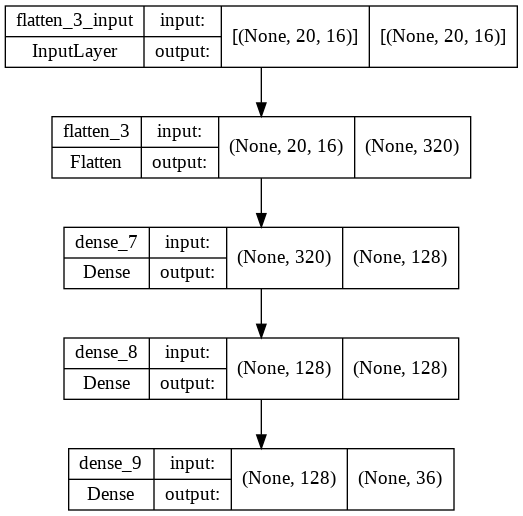

In [20]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [21]:
model.predict(test_images)

array([[ -6.369147  ,  -3.1671774 ,  -6.6375175 , ...,  -2.4752195 ,
         -1.4432142 ,  -8.412941  ],
       [ -8.42209   ,  -1.1449064 ,  -4.8586125 , ...,   1.7288166 ,
          0.21764633,  -4.8614464 ],
       [ -2.33348   ,  -3.0193195 ,  -2.973667  , ...,  -4.512005  ,
         -7.938293  ,  -4.04846   ],
       ...,
       [ -3.2674344 ,  -4.8239923 ,   0.12955502, ...,  -6.6527047 ,
         -1.4719493 ,   1.1139954 ],
       [  0.69303715,  -2.2407892 ,  -1.3287351 , ...,  -7.86791   ,
        -11.350323  ,  -2.7190847 ],
       [ -6.9432974 ,  -2.6806002 ,  -5.0166993 , ...,  -0.3149244 ,
         -3.759177  ,  -3.8428237 ]], dtype=float32)

In [22]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [23]:
print(predictions[0],
      np.argmax(predictions[0]),
      test_labels[0],
      sep='\n')

[2.00476711e-06 4.92789550e-05 1.53289386e-06 2.73960927e-06
 3.29010002e-03 2.39359406e-06 4.84786491e-04 3.76076932e-05
 5.79939042e-05 6.12256845e-05 1.14620123e-02 1.47681363e-04
 2.29925270e-08 7.91989078e-05 2.83876807e-06 5.00628630e-05
 1.29868104e-05 3.00066900e-02 1.73188346e-06 8.22982784e-08
 2.97562918e-03 1.10319794e-04 6.16698079e-02 5.22254169e-01
 2.91215224e-06 9.93564492e-04 4.93343687e-04 1.87947671e-03
 1.52782945e-06 9.00674308e-07 8.32366757e-03 8.57421011e-03
 3.46592516e-01 9.84408180e-05 2.76292703e-04 2.59690239e-07]
23
23
